# Preparation

## import tools

In [616]:
import os, numpy as np
import histogram.hdf as hh
import mcvine, mcvine.components

from matplotlib import pyplot as plt
%matplotlib notebook

import plot_utils

In [617]:
from mcvine import run_script

In [618]:
workdir = os.path.expanduser("~/simulations/mcvine/qikr")
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/m2d/simulations/mcvine/qikr


# QIKR simulation

In [598]:
from mcni.utils import conversion

def qikr(wl_0=1, wl_min=1):
    
    running_length = 0
    k0 = 2*np.pi/wl_0
    e0_max = conversion.k2e(k0)
    
    k = 2*np.pi/wl_min
    e_max = conversion.k2e(k)
    print("E_max = %s" % e_max)

    instrument = mcvine.instrument()

    # Source - includes straight tube
    tube_length = 1.0
    mod = mcvine.components.sources.SNS_source_r1('moderator',
                                                  S_filename='./SNS-STS-ROT1-15_sp.dat',
                                                  width=0.05, height=0.05, dist=tube_length,
                                                  xw=0.05, yh=0.05, Emin=0, Emax=e0_max)
    instrument.append(mod, position=(0,0,0))
    running_length += tube_length + 0.001
    
    # Source Tube  ##################################################################
    #tube = mcvine.components.optics.Guide_channeled(name='source_tube', w1=0.05, h1=0.05, w2=0.05, h2=0.05,
    #                                                l=1.0, mx=0, my=0)

    
    # Straight Guide 1 ##############################################################
    # From 100 cm to 620 cm
    guide_1_length = 5.2
    guide1 = mcvine.components.optics.Guide_channeled(name='guide_1', w1=0.05, h1=0.05, w2=0.05, h2=0.05,
                                                      l=guide_1_length, mx=3, my=3)
    instrument.append(guide1, position=(0,0,running_length))
    running_length += guide_1_length + 0.001

    
    # T0 chopper ###################################################################
    # From 620 cm to 658 cm
    #t0_chopper = mcvine.components.optics.Vertical_T0(name='t0chopper', len=0.38,
    #                                                  w1=0.08, w2=0.101, nu=120, delta=0.0, tc=0., ymin=-.045, ymax=0.045)
    #instrument.append(t0_chopper, position=(0,0,6.2))
    running_length += 0.38
    
    
    # Straight Guide 2 ##############################################################
    # From 658 cm to 708 cm
    guide_2_length = 0.5
    guide2 = mcvine.components.optics.Guide_channeled(name='guide_2', w1=0.05, h1=0.05, w2=0.05, h2=0.05,
                                                      l=guide_2_length, mx=3, my=3)
    instrument.append(guide2, position=(0,0,running_length))
    running_length += guide_2_length + 0.001
    
    
    # Bandwidth chopper ############################################################
    # From 708 cm to 713 cm

    instrument.append(mcvine.components.monitors.E_monitor('pre_chopper', Emin=0, Emax=e0_max,
                                                           nchan=1000, filename='pre_chopper.dat'),
                      position=(0,0,running_length))
    running_length += 0.001

    
    b_chopper_length = 0.05
    b_chopper_dist = running_length + b_chopper_length/2.0  # center of chopper
    print("Bandwidth chopper: %s [7.105 m]" % b_chopper_dist)
    v = conversion.k2v(k)
    delay = b_chopper_dist/v
    disk_chopper = mcvine.components.optics.DiskChopper_v2(name='band_chopper', 
                                                           yheight=0.325, nslit=1, radius=0.35,
                                                           theta_0=95.0,
                                                           delay=delay, nu=15.)                
    instrument.append(disk_chopper, position=(0,0, running_length))
    running_length += b_chopper_length + 0.001

    
    
    instrument.append(mcvine.components.monitors.E_monitor('post_chopper', Emin=0, Emax=e0_max, nchan=1000,
                                                           filename='post_chopper.dat'),
                      position=(0,0,running_length))
    running_length += 0.001

    # Tapered guide #################################################################
    # From 713 cm to 1599 cm
    guide_3_length = 8.86
    guide3 = mcvine.components.optics.Guide_channeled(name='guide_3', w1=0.05, h1=0.05, w2=0.02, h2=0.03,
                                                      l=guide_3_length, mx=3, my=3)
    instrument.append(guide3, position=(0,0,running_length))
    running_length += guide_3_length + 0.001

    instrument.append(mcvine.components.monitors.E_monitor('post_tapered', Emin=0, Emax=e0_max, nchan=1000,
                                                           filename='post_tapered.dat'),
                      position=(0,0,running_length))
    running_length += 0.001

    instrument.append(mcvine.components.monitors.DivPos_monitor('post_tapered_acc', npos=100, ndiv=50,
                                                                xwidth=0.08, yheight=0.08,
                                                               filename='post_tapered_acc.dat'),
                      position=(0,0,running_length))
    running_length += 0.001
   
    instrument.append(mcvine.components.monitors.DivLambda_monitor('post_tapered_wl_acc', nlam=100, ndiv=50,
                                                                xwidth=0.08, yheight=0.08,
                                                                   lambda_0=0, lambda_1=20,
                                                               filename='post_tapered_wl_acc.dat'),
                      position=(0,0,running_length))
    running_length += 0.001
   
    

    # Slit 0 #################################################################
    # 1 cm at 1599 cm
    slit_0_length = 0.01
    slit_0_width = 10.603
    slit_0_height = 10.603
    #slit_0 = mcvine.components.optics.Slit(name='slit_0', width=slit_0_width, height=slit_0_height)
    #instrument.append(slit_0, position=(0,0,running_length))
    #running_length += slit_0_length + 0.001
    
    instrument.append(mcvine.components.monitors.E_monitor('post_slit0', Emin=0, Emax=e0_max, nchan=1000,
                                                           filename='post_slit0.dat'),
                      position=(0,0,running_length))
    running_length += 0.001
    #instrument.append(mcvine.components.monitors.PSD_monitor('source_psd2', nx=250, ny=250, xwidth=1., yheight=1.,
    #                                                          filename='source_psd3_wide.dat'), position=(0,0,running_length))
    #instrument.append(mcvine.components.monitors.PSD_monitor('source_psd2', nx=250, ny=250, xwidth=.1, yheight=.1,
    #                                                          filename='source_psd3.dat'), position=(0,0,running_length))

    
    
    
    return instrument

In [608]:
%%time
!rm -rf out-mcvine/
#!rm source_psd3.dat
#!rm source_psd3_wide.dat
!rm post_tapered_acc.dat
!rm post_tapered_wl_acc.dat
# quick sim
instrument = qikr(wl_min=7.7)
neutrons = instrument.simulate(int(1e6),outputdir="out-mcvine", overwrite_datafiles=False, iteration_no=0)


!ls -ltr post*.dat

rm: cannot remove ‘post_tapered_acc.dat’: No such file or directory
rm: cannot remove ‘post_tapered_wl_acc.dat’: No such file or directory
E_max = 1.37972831134
Bandwidth chopper: 7.109 [7.105 m]
<class 'Monitors_Divpos_monitor'> has not implemented _get_histogram
<class 'Monitors_Divlambda_monitor'> has not implemented _get_histogram
-rw-r--r-- 1 m2d users 35494 Oct 31 09:25 post_tapered_Acc.dat
-rw-r--r-- 1 m2d users 20951 Oct 31 09:50 post_chopper.dat
-rw-r--r-- 1 m2d users 20344 Oct 31 09:50 post_tapered.dat
-rw-r--r-- 1 m2d users 58693 Oct 31 09:50 post_tapered_acc.dat
-rw-r--r-- 1 m2d users 82013 Oct 31 09:50 post_tapered_wl_acc.dat
-rw-r--r-- 1 m2d users 20338 Oct 31 09:50 post_slit0.dat
CPU times: user 29.3 s, sys: 1.38 s, total: 30.7 s
Wall time: 31.3 s


## Acceptance

In [619]:
data=np.loadtxt('post_tapered_wl_acc.dat')
print data.shape
div_width=4.0 # degrees
wl_max = 20.0
wl_bins = 100

data_ = data.reshape(3, data.shape[0]/3, data.shape[1])

div_range = np.arange(-div_width/2, div_width/2, div_width/data_.shape[1])
wl_range = np.arange(0.0, wl_max, wl_max/wl_bins)

plot_utils.plot_heatmap(wl_range, div_range, data_[0], x_title="Wavelength", y_title="Divergence [deg]")

div_dist = np.sum(data_[0], axis=1)
plot_utils.plot1d([div_range, div_dist], x_title="Divergence [deg]")

wl_dist = np.sum(data_[0], axis=0)
plot_utils.plot1d([wl_range, wl_dist], x_title="Wavelength", )



(150, 100)


In [613]:
data=np.loadtxt('post_tapered_acc.dat')
print data.shape
psd_width=.5
div_width=4.0 # degrees

data_ = data.reshape(3, data.shape[0]/3, data.shape[1])
print data_.shape


pos_range = np.arange(-psd_width/2, psd_width/2, psd_width/data_.shape[2])
div_range = np.arange(-div_width/2, div_width/2, div_width/data_.shape[1])
print div_range.shape

plot_utils.plot_heatmap(pos_range, div_range, data_[0])

x_dist = np.sum(data_[0], axis=1)

plot_utils.plot1d([div_range, x_dist])


(150, 100)
(3, 50, 100)
(50,)


In [548]:
psd=np.loadtxt('source_psd3.dat')
#psd=np.loadtxt('source_psd3_wide.dat')
print psd.shape
psd_width=.1

psd_ = psd.reshape(3, psd.shape[0]/3, psd.shape[1])
plot_utils.plot_heatmap(np.arange(-psd_width/2, psd_width/2, psd_width/psd.shape[1]),
                        np.arange(-psd_width/2, psd_width/2, psd_width/(psd.shape[0]/3)), psd_[0])
x_dist = np.sum(psd_[0], axis=0)

plot_utils.plot1d([np.arange(-psd_width/2, psd_width/2, psd_width/psd.shape[1]), x_dist])


(750, 250)


In [600]:
pre_chop = hh.load('./out-mcvine/step0/pre_chopper.h5')
post_chop = hh.load('./out-mcvine/step0/post_chopper.h5')
post_tapered = hh.load('./out-mcvine/step0/post_tapered.h5')
post_slit0 = hh.load('./out-mcvine/step0/post_slit0.h5')
        
plot_list = [[2*np.pi/conversion.e2k(pre_chop.energy), pre_chop.I],
             [2*np.pi/conversion.e2k(post_chop.energy), post_chop.I],
             [2*np.pi/conversion.e2k(post_tapered.energy), post_tapered.I],
             [2*np.pi/conversion.e2k(post_slit0.energy), post_slit0.I],
            ]

plot_utils.plot1d(plot_list, y_log=False)

In [407]:
wl_dist=np.loadtxt('IE.dat')
print wl_dist.shape

plot_utils.plot1d([wl_dist.T[0], wl_dist.T[1]],y_log=True)


(2000, 4)


# Parallel simulation

## create script

In [28]:
%%file myinstrument.py
import mcvine, mcvine.components
from mcni.utils import conversion
import numpy as np
instrument = mcvine.instrument()


wl_0=1
wl_min=7.7
k0 = 2*np.pi/wl_0
e0_max = conversion.k2e(k0)
    
k = 2*np.pi/wl_min
e_max = conversion.k2e(k)

# Source
mod = mcvine.components.sources.SNS_source_r1('moderator',
                                              S_filename='./SNS-STS-ROT1-15_sp.dat',
                                              width=0.05, height=0.05, dist=1.0,
                                              xw=0.05, yh=0.05, Emin=0, Emax=e0_max)
instrument.append(mod, position=(0,0,0))
instrument.append(mcvine.components.monitors.E_monitor('source_monitor', Emin=0, Emax=e0_max,
                                                           nchan=1000, filename='source.dat'), position=(0,0,0.001))

# Source Tube  ##################################################################
#tube = mcvine.components.optics.Guide_channeled(name='source_tube', w1=0.05, h1=0.05, w2=0.05, h2=0.05,
#                                                l=1.0, mx=0, my=0)
   
instrument.append(mod, position=(0,0,0.51))
instrument.append(mcvine.components.monitors.E_monitor('tube_monitor', Emin=0, Emax=e0_max,
                                                           nchan=1000, filename='tube.dat'), position=(0,0,0.52))

    
# T0 chopper ###################################################################
#t0_chopper = mcvine.components.optics.Vertical_T0(name='t0chopper', len=0.474,
#                                                  w1=0.08, w2=0.101, nu=120, delta=0.0, tc=0., ymin=-.045, ymax=0.045)
#instrument.append(t0_chopper, position=(0,0,6.2))
    
# Bandwidth chopper ############################################################
b_chopper_dist = 8.0  # meters
v = conversion.k2v(k)
delay = b_chopper_dist/v
disk_chopper = mcvine.components.optics.DiskChopper_v2(name='band_chopper', 
                                                       yheight=0.325, nslit=1, radius=0.35,
                                                       theta_0=95.0,
                                                       delay=delay, nu=15.0)
                                                       
                                          
instrument.append(disk_chopper, position=(0,0, b_chopper_dist))

# Monitors

    #instrument.append(mcvine.components.monitors.L_monitor('monitor', Lmin=0, Lmax=15, nchan=150,
    #                                                       xwidth=.01, yheight=.01, filename='IL.dat'),
    #                  position=(0,0,8.6))
instrument.append(mcvine.components.monitors.E_monitor('monitor', Emin=0, Emax=e0_max, nchan=2000, filename='IE.dat'),
                  position=(0,0,8.6))


Overwriting myinstrument.py


## run script

In [30]:
%%time
run_script.run_mpi('./myinstrument.py', 'work', ncount=1e6, nodes=10, overwrite_datafiles=True)

CPU times: user 3.1 ms, sys: 17.6 ms, total: 20.7 ms
Wall time: 1min 1s


In [27]:
!mpirun -np 10 python -m "mcvine.run_script" ./myinstrument.py --workdir work --ncount 1000000 --overwrite_datafiles --buffer_size 20000 --mpi-mode=worker 

Traceback (most recent call last):
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mcvine/run_script.py", line 187, in <module>
    if __name__ == '__main__': main()
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/click/core.py", line 716, in __call__
    return self.main(*args, **kwargs)
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/click/core.py", line 696, in main
    rv = self.invoke(ctx)
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/click/core.py", line 892, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/click/core.py", line 534, in invoke
    return cal

    buffer_size=buffer_size, overwrite_datafiles=overwrite_datafiles, **kwds)
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mcvine/run_script.py", line 69, in run1_mpi
    run1(script, workdir, ncount1, **kwds)
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mcvine/run_script.py", line 99, in run1
    m = imp.load_source('mcvinesim', script)
  File "./myinstrument.py", line 8, in <module>
    k0 = 2*np.pi/wl_0
NameError: name 'np' is not defined
Traceback (most recent call last):
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mcvine/run_script.py", line 187, in <module>
    if __name__ == '__main__': main()
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/s

## check results

In [31]:
ls work/

IE.h5                     rank2-step2/  rank5-step1/  rank8-step0/
post-processing-scripts/  rank2-step3/  rank5-step2/  rank8-step1/
rank0-step0/              rank2-step4/  rank5-step3/  rank8-step2/
rank0-step1/              rank3-step0/  rank5-step4/  rank8-step3/
rank0-step2/              rank3-step1/  rank6-step0/  rank8-step4/
rank0-step3/              rank3-step2/  rank6-step1/  rank9-step0/
rank0-step4/              rank3-step3/  rank6-step2/  rank9-step1/
rank1-step0/              rank3-step4/  rank6-step3/  rank9-step2/
rank1-step1/              rank4-step0/  rank6-step4/  rank9-step3/
rank1-step2/              rank4-step1/  rank7-step0/  rank9-step4/
rank1-step3/              rank4-step2/  rank7-step1/  source.h5
rank1-step4/              rank4-step3/  rank7-step2/  tube.h5
rank2-step0/              rank4-step4/  rank7-step3/
rank2-step1/              rank5-step0/  rank7-step4/


In [ ]:
cat work/rank0-step0/number_of_mc_samples

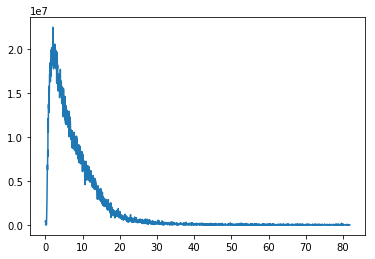

In [32]:
IE = hh.load('./work/IE.h5')
plt.figure()
plt.plot(IE.energy, IE.I)

In [ ]:
    #instrument.append(mcvine.components.monitors.E_monitor('source_monitor', Emin=0, Emax=e0_max,
    #                                                       nchan=1000, filename='source.dat'), position=(0,0,1.001))

    #instrument.append(mcvine.components.monitors.PSD_monitor_4PI('source_psd', nx=250, ny=250,
    #                                                          filename='source_psd.dat'), position=(0,0,1.002))
    #instrument.append(mcvine.components.monitors.EPSD_monitor('source_epsd', Emin=0, Emax=e0_max,
    #                                                          xwidth=1, yheight=1,
    #                                                       nx=500, nE=1000, filename='source_epsd.dat'), position=(0,0,6.21))

    
    
        
    #instrument.append(mcvine.components.monitors.E_monitor('guide_1_monitor', Emin=0, Emax=e0_max,
    #                                                       nchan=1000, filename='guide_1.dat'), position=(0,0,6.21))
    #instrument.append(mcvine.components.monitors.PSD_monitor_4PI('guide_1_psd', nx=250, ny=250,
    #                                                          filename='guide_1_psd.dat'), position=(0,0,6.21))
    #instrument.append(mcvine.components.monitors.EPSD_monitor('guide_1_epsd', Emin=0, Emax=e0_max,
    #                                                          xwidth=1, yheight=1,
    #                                                       nx=500, nE=1000, filename='guide_1_epsd.dat'), position=(0,0,6.21))

    
    #instrument.append(mcvine.components.monitors.PSD_monitor('source_psd2', nx=250, ny=250, xwidth=.1, yheight=.1,
    #                                                          filename='source_psd3.dat'), position=(0,0,mon_dist))

    
    
        #instrument.append(mcvine.components.monitors.L_monitor('monitor', Lmin=0, Lmax=25, nchan=150,
    #                                                       xwidth=.1, yheight=.1, filename='IL.dat'),
    #                  position=(0,0,mon_dist))
